<a href="https://colab.research.google.com/github/Akashram28/Whale-Call-Detection/blob/main/Whale_Call_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import cv2
%matplotlib inline

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/Right Whale Call/train_set'
TEST_PATH = '/content/drive/MyDrive/Right Whale Call/test_set'

In [ ]:
train_images =  os.listdir(TRAIN_PATH)
train_images[0]

'train19599'

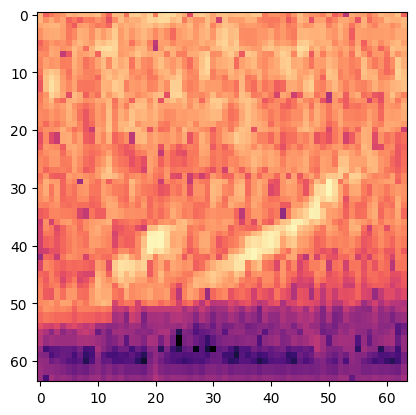

In [ ]:
img_path = os.path.join(TRAIN_PATH,train_images[0])
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img.shape

(64, 64, 4)

In [60]:
train_df = pd.read_csv('/content/drive/MyDrive/Right Whale Call/train_set.csv')
train_df.head()

,Unnamed: 0,clip_name,label
0,20155,train20156.aiff,0
1,19102,train19103.aiff,1
2,19763,train19764.aiff,1
3,5561,train5562.aiff,0
4,16244,train16245.aiff,0


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Right Whale Call/test_set.csv')
test_df.head()

,Unnamed: 0,clip_name,label
0,15424,train15425.aiff,0
1,955,train956.aiff,0
2,3616,train3617.aiff,1
3,11441,train11442.aiff,1
4,10975,train10976.aiff,0


In [61]:
train_df['clip_name'] = train_df['clip_name'].apply(lambda x: str(x)[:-5])
train_df.head()

,Unnamed: 0,clip_name,label
0,20155,train20156,0
1,19102,train19103,1
2,19763,train19764,1
3,5561,train5562,0
4,16244,train16245,0


In [62]:
train_df.drop('Unnamed: 0' , axis=1, inplace=True)
train_df.head()

,clip_name,label
0,train20156,0
1,train19103,1
2,train19764,1
3,train5562,0
4,train16245,0


In [68]:
import random
def generate_batch(batch_size=32):
  X = []
  y = []
  sampled_imgs = random.sample(train_images,batch_size)
  for i in sampled_imgs:
    X.append(np.array(cv2.imread(os.path.join(TRAIN_PATH,i))))
    y.append(train_df[train_df['clip_name'] == i]['label'])
  X = np.array(X)/255.0
  y = np.array(y)
  return X,y

In [55]:
import tensorflow as tf
from keras import models
from keras.layers import Conv2D, LeakyReLU,Flatten,Dense,MaxPooling2D,Dropout

In [73]:
def generateModel():
  model = models.Sequential()

  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  model.summary()
  return model

In [76]:
model = generateModel()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 6, 6, 64)         

In [78]:
X_train,y_train = generate_batch()
X_train.shape

(32, 64, 64, 3)

In [71]:
y_train

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [77]:
num_batches = 10
for i in range(num_batches):
  X_train,y_train = generate_batch()
  loss, accuracy = model.train_on_batch(X_train,y_train)
  print(f'For batch {i} : Acc : {accuracy} , Loss : {loss}')

For batch 0 : Acc : 0.59375 , Loss : 0.6668730974197388
For batch 1 : Acc : 0.5625 , Loss : 0.6874480247497559
For batch 2 : Acc : 0.40625 , Loss : 0.7577263116836548
For batch 3 : Acc : 0.6875 , Loss : 0.629705548286438
For batch 4 : Acc : 0.5625 , Loss : 0.7041746377944946
For batch 5 : Acc : 0.53125 , Loss : 0.6613666415214539
For batch 6 : Acc : 0.46875 , Loss : 0.7486793994903564
For batch 7 : Acc : 0.40625 , Loss : 0.7330551743507385
For batch 8 : Acc : 0.40625 , Loss : 0.6987605094909668
For batch 9 : Acc : 0.46875 , Loss : 0.7275061011314392


In [82]:
time_taken_by_1_batches = 6 # in secs
num_samples_in_each_batch = 32
total_samples = len(train_images)
num_batches = total_samples/num_samples_in_each_batch
print(f'Time for training 1 epoch : {(time_taken_by_1_batches*num_batches)/60} in mins')

Time for training 1 epoch : 34.94375 in mins
